In [1]:
import pandas as pd
import numpy as np

In [2]:
dataset = pd.read_csv("Preprocessd_data.csv")
dataset

,Pregnant,Glucose,Diastolic_BP,Serum_Insulin,BMI,Diabetes_Pedigree,Age,Class
0,6.0,148.0,72.0,125.0,33.6,0.627,50.0,1
1,1.0,85.0,66.0,125.0,26.6,0.351,31.0,0
2,8.0,183.0,64.0,125.0,23.3,0.672,32.0,1
3,1.0,89.0,66.0,94.0,28.1,0.167,21.0,0
4,0.0,137.0,40.0,168.0,43.1,1.200,33.0,1
...,...,...,...,...,...,...,...,...
763,10.0,101.0,76.0,180.0,32.9,0.171,63.0,0
764,2.0,122.0,70.0,125.0,36.8,0.340,27.0,0
765,5.0,121.0,72.0,112.0,26.2,0.245,30.0,0
766,1.0,126.0,60.0,125.0,30.1,0.349,47.0,1


In [3]:
dataset.isnull().sum()

Pregnant             0
Glucose              0
Diastolic_BP         0
Serum_Insulin        0
BMI                  0
Diabetes_Pedigree    0
Age                  0
Class                0
dtype: int64

In [4]:
quan=[]
qual=[]
for columnName in dataset.columns:
    #print(columnName)
    if(dataset[columnName].dtype=='O'):
        #print("qual")
        qual.append(columnName)
    else:
        #print("quan")
        quan.append(columnName)
        


In [5]:
quan

['Pregnant',
 'Glucose',
 'Diastolic_BP',
 'Serum_Insulin',
 'BMI',
 'Diabetes_Pedigree',
 'Age',
 'Class']

In [6]:
qual

[]

In [7]:

        descriptive=pd.DataFrame(index=["Mean","Median","Mode","Q1:25%","Q2:50%",
                                   "Q3:75%","99%","Q4:100%","IQR","1.5rule","Lesser","Greater","Min","Max"],columns=quan)
        for columnName in quan:
            descriptive[columnName]["Mean"]=dataset[columnName].mean()
            descriptive[columnName]["Median"]=dataset[columnName].median()
            descriptive[columnName]["Mode"]=dataset[columnName].mode()[0]
            descriptive[columnName]["Q1:25%"]=dataset.describe()[columnName]["25%"]
            descriptive[columnName]["Q2:50%"]=dataset.describe()[columnName]["50%"]
            descriptive[columnName]["Q3:75%"]=dataset.describe()[columnName]["75%"]
            descriptive[columnName]["99%"]=np.percentile(dataset[columnName],99)
            descriptive[columnName]["Q4:100%"]=dataset.describe()[columnName]["max"]
            descriptive[columnName]["IQR"]=descriptive[columnName]["Q3:75%"]-descriptive[columnName]["Q1:25%"]
            descriptive[columnName]["1.5rule"]=1.5*descriptive[columnName]["IQR"]
            descriptive[columnName]["Lesser"]=descriptive[columnName]["Q1:25%"]-descriptive[columnName]["1.5rule"]
            descriptive[columnName]["Greater"]=descriptive[columnName]["Q3:75%"]+descriptive[columnName]["1.5rule"]
            descriptive[columnName]["Min"]=dataset[columnName].min()
            descriptive[columnName]["Max"]=dataset[columnName].max()
     

In [8]:
descriptive

,Pregnant,Glucose,Diastolic_BP,Serum_Insulin,BMI,Diabetes_Pedigree,Age,Class
Mean,3.83724,121.687,72.3581,136.03,32.3947,0.458914,33.1999,0.348958
Median,3,117,72,125,32.3947,0.3725,29,0
Mode,1,99,72,125,32,1.2,22,0
Q1:25%,1,99.75,64,121.5,27.5,0.24375,24,0
Q2:50%,3,117,72,125,32.3947,0.3725,29,0
Q3:75%,6,140.25,80,127.25,36.6,0.62625,41,1
99%,13,196,104,360.625,50.0825,1.2,66.5,1
Q4:100%,13.5,199,104,360.625,50.25,1.2,66.5,1
IQR,5,40.5,16,5.75,9.1,0.3825,17,1
1.5rule,7.5,60.75,24,8.625,13.65,0.57375,25.5,1.5


In [21]:
dataset.shape

(768, 8)

In [23]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 8 columns):
Pregnant             768 non-null float64
Glucose              768 non-null float64
Diastolic_BP         768 non-null float64
Serum_Insulin        768 non-null float64
BMI                  768 non-null float64
Diabetes_Pedigree    768 non-null float64
Age                  768 non-null float64
Class                768 non-null int64
dtypes: float64(7), int64(1)
memory usage: 48.1 KB


In [26]:
dataset['Class'].value_counts() # 500 patients has no diabetes and 268 patients has diabetes

0    500
1    268
Name: Class, dtype: int64

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

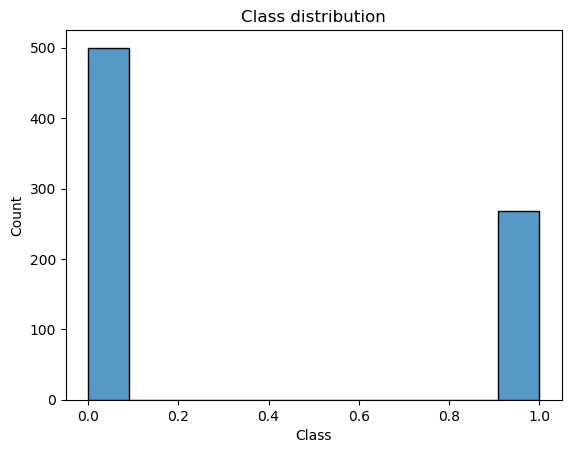

In [36]:
sns.histplot(data=dataset, x='Class')
plt.title("Class distribution")
plt.show()
# based on this we came to know the dataset is slighlty imbalanced


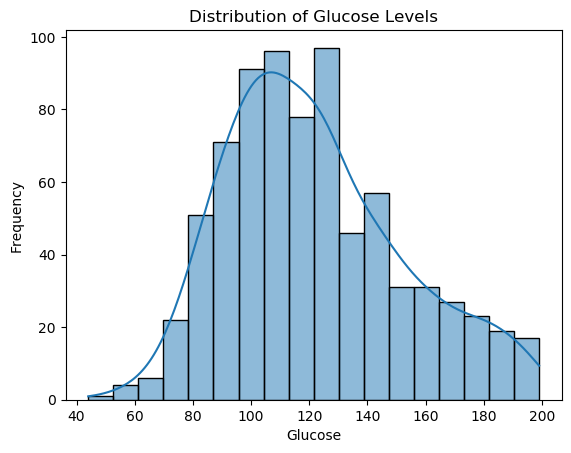

In [38]:

sns.histplot(dataset['Glucose'], kde=True)
plt.title("Distribution of Glucose Levels")
plt.xlabel("Glucose")
plt.ylabel("Frequency")
plt.show()
# since there is a right skew fewer people has hiher daibetes value

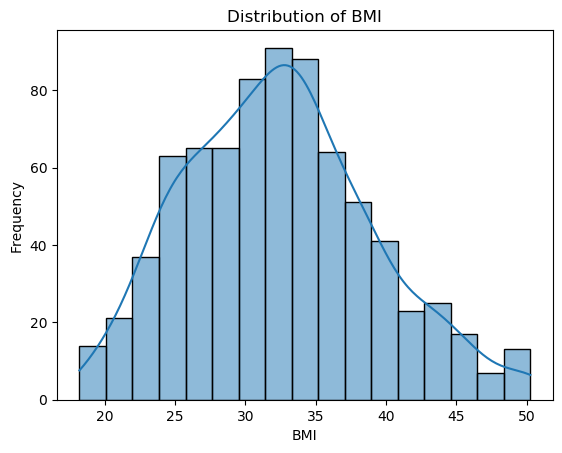

In [40]:
sns.histplot(dataset['BMI'], kde=True)
plt.title("Distribution of BMI")
plt.xlabel("BMI")
plt.ylabel("Frequency")
plt.show()
# this column also slighlty right skwed and fewer people has overweight and we come to know that persons with overweight can have the chances of higher diabetes

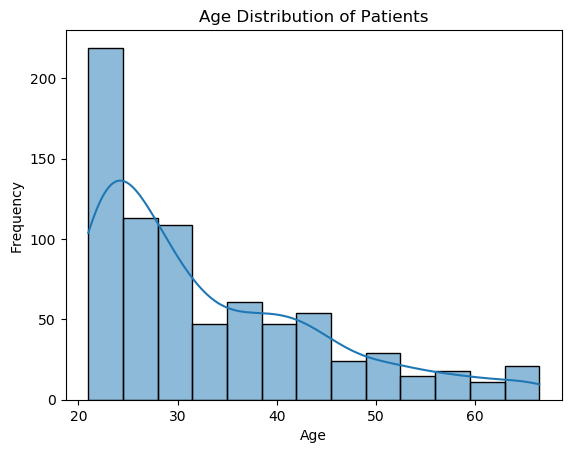

In [42]:
sns.histplot(dataset['Age'], kde=True)
plt.title("Age Distribution of Patients")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()
# Age column also skewed right and come to know that minimum no.of middle age peopels and older citizen are having high diabetes values

In [49]:
dataset[['Pregnant', 'Glucose', 'Diastolic_BP', 'Serum_Insulin', 'BMI',
       'Diabetes_Pedigree', 'Age']].skew()


Pregnant             0.853962
Glucose              0.532719
Diastolic_BP         0.105665
Serum_Insulin       -0.118221
BMI                  0.349272
Diabetes_Pedigree    1.024428
Age                  1.067170
dtype: float64

In [46]:
dataset.columns

Index(['Pregnant', 'Glucose', 'Diastolic_BP', 'Serum_Insulin', 'BMI',
       'Diabetes_Pedigree', 'Age', 'Class'],
      dtype='object')

# BIVARIATE ANALYSIS

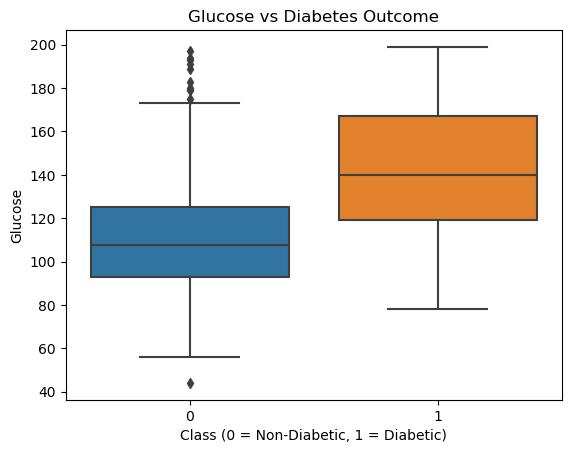

In [52]:
sns.boxplot(x='Class', y='Glucose', data=dataset)
plt.title("Glucose vs Diabetes Outcome")
plt.xlabel("Class (0 = Non-Diabetic, 1 = Diabetic)")
plt.ylabel("Glucose")
plt.show()
# diabetes patients having high diabetes value

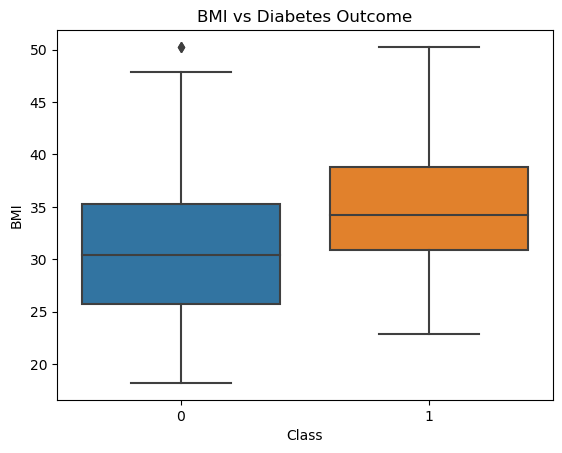

In [54]:
sns.boxplot(x='Class', y='BMI', data=dataset)
plt.title("BMI vs Diabetes Outcome")
plt.show()
# patients with overweight have high risk of diabetes